# **📊 Basic Analysis**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATE_FILE = '2023-03-10' # Format YYYY-MM-DD
DATA_PATH = f"data/processed/{DATE_FILE}_istdaten_cleaned.parquet"
transport_data = pd.read_parquet(DATA_PATH)

OPERATORS_DATA_PATH = f"data/processed/{DATE_FILE}_operators.csv"
operators = pd.read_csv(OPERATORS_DATA_PATH)

In [3]:
transport_data.head()

,date,trip_id,product_id,line_text,transport_type,is_additional_trip,is_cancelled,stop_id,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip,stop_lon,stop_lat,stop_name
0,2023-03-10,80:800631:17230:000,Train,RB,RB,False,False,8500090,2023-03-10 04:59:00,2023-03-10 04:59:00,FORECAST,NaT,NaT,NaN,False,2612665,1268525,Basel Bad Bf
1,2023-03-10,80:800631:17233:000,Train,RB,RB,False,False,8500090,NaT,NaT,NaN,2023-03-10 06:07:00,2023-03-10 06:07:00,FORECAST,False,2612665,1268525,Basel Bad Bf
3,2023-03-10,80:800631:17235:000,Train,RB,RB,False,False,8500090,NaT,NaT,NaN,2023-03-10 06:43:00,2023-03-10 06:43:00,FORECAST,False,2612665,1268525,Basel Bad Bf
4,2023-03-10,80:800631:17236:000,Train,RB,RB,False,False,8500090,2023-03-10 06:33:00,2023-03-10 06:37:00,FORECAST,NaT,NaT,NaN,False,2612665,1268525,Basel Bad Bf
5,2023-03-10,80:800631:17237:000,Train,RB,RB,False,False,8500090,NaT,NaT,NaN,2023-03-10 07:15:00,2023-03-10 07:15:00,FORECAST,False,2612665,1268525,Basel Bad Bf


In [4]:
operators.head()

,operator_id,operator_abbreviation,operator_name
0,80:800631,DB,DB Regio AG Baden-Württemberg
1,80:800693,DB Regio,DB ZugBus Regionalverkehr Alb-Bodensee
2,80:80____,DB,DB Fernverkehr AG
3,80:sbg034,sbg034,sbg034
4,81:817000,NeTS-ÖBB,NeTS Planung ÖBB


In [5]:
def get_operator_id(row):
    trip_id = row['trip_id']
    operator_id = ':'.join(trip_id.split(':')[:2])
    return operator_id

transport_data = transport_data.assign(operator_id=transport_data.apply(get_operator_id, axis=1))
transport_data = transport_data.merge(operators, on='operator_id')
transport_data.head()

,date,trip_id,product_id,line_text,transport_type,is_additional_trip,is_cancelled,stop_id,arrival_time,arrival_forecast,...,departure_time,departure_forecast,departure_forecast_status,is_through_trip,stop_lon,stop_lat,stop_name,operator_id,operator_abbreviation,operator_name
0,2023-03-10,80:800631:17230:000,Train,RB,RB,False,False,8500090,2023-03-10 04:59:00,2023-03-10 04:59:00,...,NaT,NaT,NaN,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg
1,2023-03-10,80:800631:17233:000,Train,RB,RB,False,False,8500090,NaT,NaT,...,2023-03-10 06:07:00,2023-03-10 06:07:00,FORECAST,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg
2,2023-03-10,80:800631:17235:000,Train,RB,RB,False,False,8500090,NaT,NaT,...,2023-03-10 06:43:00,2023-03-10 06:43:00,FORECAST,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg
3,2023-03-10,80:800631:17236:000,Train,RB,RB,False,False,8500090,2023-03-10 06:33:00,2023-03-10 06:37:00,...,NaT,NaT,NaN,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg
4,2023-03-10,80:800631:17237:000,Train,RB,RB,False,False,8500090,NaT,NaT,...,2023-03-10 07:15:00,2023-03-10 07:15:00,FORECAST,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg


In [6]:
# We add a new column to the datafram that contains the delay in minutes
transport_data["arrival_delay"] = (transport_data["arrival_forecast"] - transport_data["arrival_time"]).dt.total_seconds() / 60
transport_data["departure_delay"] = (transport_data["departure_forecast"] - transport_data["departure_time"]).dt.total_seconds() / 60

transport_data[['arrival_delay', 'departure_delay']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

transport_data.head()

,date,trip_id,product_id,line_text,transport_type,is_additional_trip,is_cancelled,stop_id,arrival_time,arrival_forecast,...,departure_forecast_status,is_through_trip,stop_lon,stop_lat,stop_name,operator_id,operator_abbreviation,operator_name,arrival_delay,departure_delay
0,2023-03-10,80:800631:17230:000,Train,RB,RB,False,False,8500090,2023-03-10 04:59:00,2023-03-10 04:59:00,...,NaN,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg,0.0,NaN
1,2023-03-10,80:800631:17233:000,Train,RB,RB,False,False,8500090,NaT,NaT,...,FORECAST,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg,NaN,0.0
2,2023-03-10,80:800631:17235:000,Train,RB,RB,False,False,8500090,NaT,NaT,...,FORECAST,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg,NaN,0.0
3,2023-03-10,80:800631:17236:000,Train,RB,RB,False,False,8500090,2023-03-10 06:33:00,2023-03-10 06:37:00,...,NaN,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg,4.0,NaN
4,2023-03-10,80:800631:17237:000,Train,RB,RB,False,False,8500090,NaT,NaT,...,FORECAST,False,2612665,1268525,Basel Bad Bf,80:800631,DB,DB Regio AG Baden-Württemberg,NaN,0.0


## **🚆 Types of Transports in Swiss Railways** (Arnaud)

TODO: Group the data by the VERKEHRSMITTEL_TEXT column to find the count of each type of transport in the dataset.

## **🎫 Swiss Transport Products Popularity** (Arnaud)
TODO: Group the data by the PRODUKT_ID column to analyze the usage of different products offered by the Swiss transport system.

## **🛑 Cancelled Journeys** (Arnaud)

TODO: Calculate the proportion of cancelled trains by filtering the data using the FAELLT_AUS_TF column.

## **⌚ Punctuality of Swiss Railways** (Ozan)

TODO: Create a histogram of the lateness of trains by calculating the difference between the AN_PROGNOSE and ANKUNFTSZEIT columns, as well as the AB_PROGNOSE and ABFAHRTSZEIT columns.

### Basic statistics of the lateness

In [11]:
transport_data[['arrival_delay', 'departure_delay']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,arrival_delay,departure_delay
count,2170604.00000,2170418.00000
mean,1.41408,1.60953
std,5.57046,5.55495
min,-1442.01667,-1439.85000
25%,0.36667,0.53333
50%,1.08333,1.23333
75%,2.05000,2.20000
max,718.68333,718.68333


### Arrival delays

<AxesSubplot: title={'center': 'Histogram of arrival delays'}, xlabel='arrival_delay', ylabel='Count'>

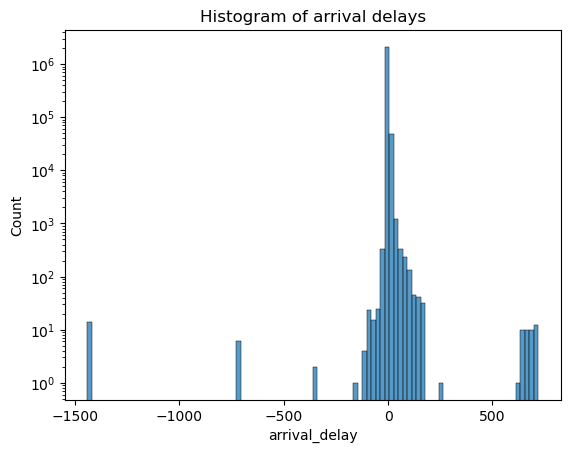

In [7]:
# This histogram coressponds to the delays in minutes for each arrival of each line
plt.title("Histogram of arrival delays")
sns.histplot(data=transport_data, x="arrival_delay", bins=100, log_scale=(False, True))

<AxesSubplot: title={'center': 'Histogram of departure delays (within 200 minutes)'}, xlabel='departure_delay', ylabel='Count'>

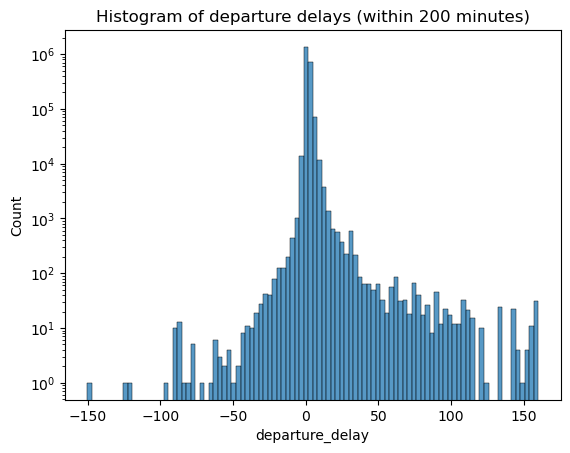

In [8]:
# This histogram coressponds to the delays in minutes for each departure of each line (we remove the outliers)
plt.title("Histogram of departure delays (within 200 minutes)")
sns.histplot(data=transport_data[(transport_data["departure_delay"] > -200) & (transport_data["departure_delay"] < 200)], x="departure_delay", bins=100, log_scale=(False, True))

We can see that the distributions on a logarithmic y are bi-modal. They seem to follow a laplace distribution centered around 0.

### Departur delays

<AxesSubplot: title={'center': 'Histogram of departure delays (witin 100 minutes)'}, xlabel='departure_delay', ylabel='Count'>

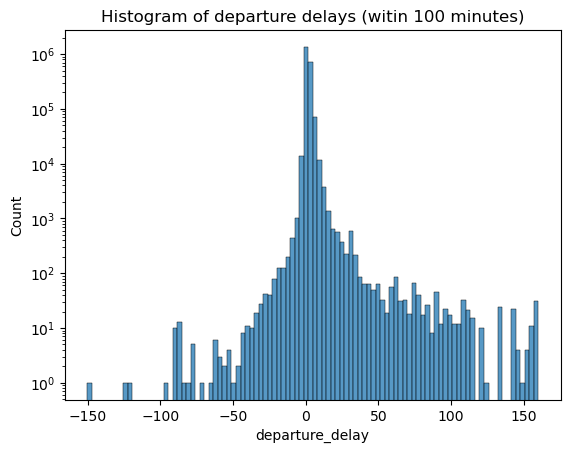

In [9]:
# This histogram coressponds to the delays in minutes for each departure of each line (we remove the outliers)
plt.title("Histogram of departure delays (witin 100 minutes)")
sns.histplot(data=transport_data[(transport_data["departure_delay"] > -200) & (transport_data["departure_delay"] < 200)], x="departure_delay", bins=100, log_scale=(False, True))

## **🏅 Comparing Operators in Swiss Railways** (Ozan)

TODO: Group the data by the BETREIBER_NAME column to analyze the performance of different operators. Calculate metrics such as average lateness, number of trains, and cancellation rate.

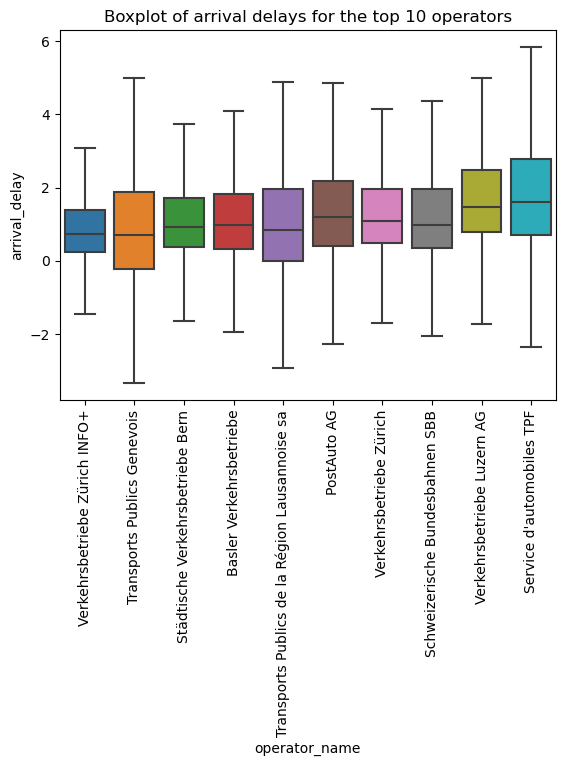

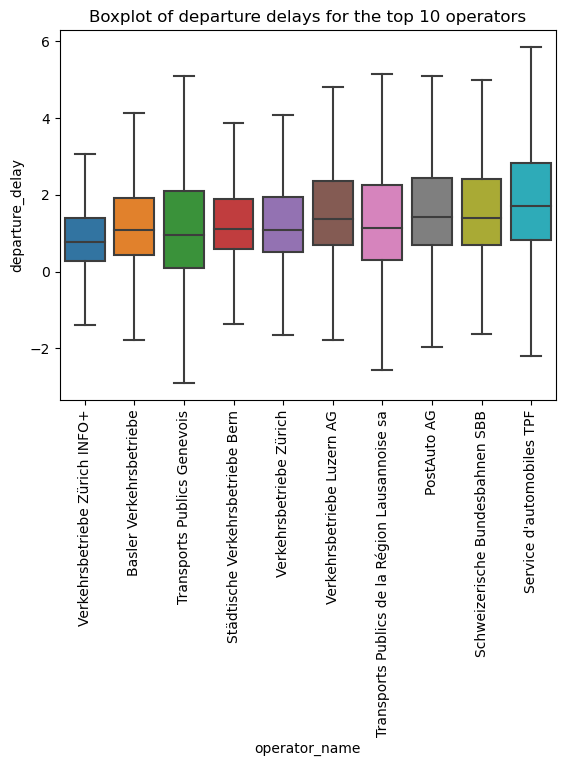

In [81]:
counts = transport_data.groupby('operator_name')['transport_type'].count().sort_values(ascending=False)[:10]
top_operators = transport_data[transport_data['operator_name'].isin(counts.index)]

# Get the mean arrival delay for each operator
mean_arrival_delay = top_operators.groupby('operator_name')['arrival_delay'].mean().sort_values()

# Set the order of the boxplot based on the mean arrival delay
boxplot_order = mean_arrival_delay.index.tolist()

plt.title("Boxplot of arrival delays for the top 10 operators")
sns.boxplot(x='operator_name', y='arrival_delay', data=top_operators, showfliers=False, order=boxplot_order)
# Rotate the x labels
plt.xticks(rotation=90)
plt.show()

# Get the mean departure delay for each operator
mean_departure_delay = top_operators.groupby('operator_name')['departure_delay'].mean().sort_values()

# Set the order of the boxplot based on the mean arrival delay
boxplot_order = mean_departure_delay.index.tolist()


plt.title("Boxplot of departure delays for the top 10 operators")
sns.boxplot(x='operator_name', y='departure_delay', data=top_operators, showfliers=False, order=boxplot_order)
# Rotate the x labels
plt.xticks(rotation=90)
plt.show()

## **🚉 Identifying High-Traffic Areas** (Ozan)

TODO: Group the data by the LINIEN_TEXT and HALTESTELLEN_NAME columns to find the busiest lines and stops.

In [82]:
# Group the data by line_text and stop_name and count the number of rows in each group
grouped_data = transport_data.groupby(['line_text', 'stop_name']).size().reset_index(name='count')

# Sort the data by count in descending order
sorted_data = grouped_data.sort_values('count', ascending=False)

,line_text,stop_name,count
754903,13,"Zürich, Escher-Wyss-Platz",588
22532,10,"Bern, Bahnhof",534
22670,10,"Bern, Viktoriaplatz",529
22636,10,"Bern, Rosengarten",529
22639,10,"Bern, Salem",529
22648,10,"Bern, Schönburg",529
22646,10,"Bern, Schosshaldenfriedhof",528
22574,10,"Bern, Galgenfeld",528
34275,10,"Ostermundigen, Waldeck",528
34263,10,"Ostermundigen, Bahnhof",528


In [83]:
# Print the top 20 busiest lines and stops
sorted_data.head(20)

,line_text,stop_name,count
754903,13,"Zürich, Escher-Wyss-Platz",588
22532,10,"Bern, Bahnhof",534
22670,10,"Bern, Viktoriaplatz",529
22636,10,"Bern, Rosengarten",529
22639,10,"Bern, Salem",529
22648,10,"Bern, Schönburg",529
22646,10,"Bern, Schosshaldenfriedhof",528
22574,10,"Bern, Galgenfeld",528
34275,10,"Ostermundigen, Waldeck",528
34263,10,"Ostermundigen, Bahnhof",528


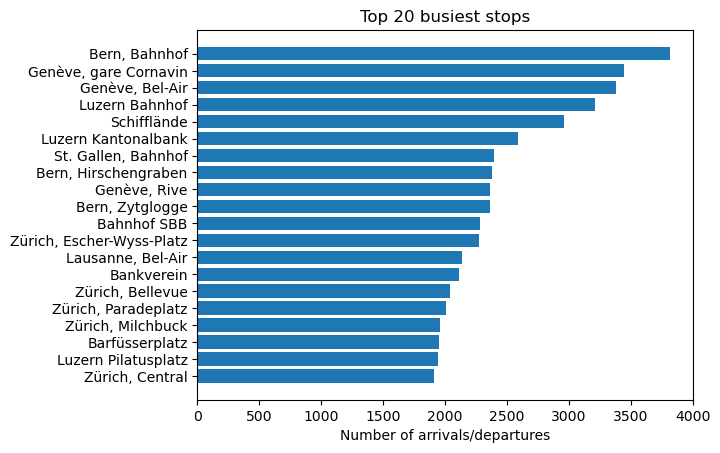

In [96]:
# Do the same but just to find the buisiest stop
grouped_data = transport_data.groupby(['stop_name']).size().reset_index(name='count')
sorted_data = grouped_data.sort_values('count', ascending=False)
sorted_data.head(20)

plt.barh(sorted_data['stop_name'].iloc[:20], sorted_data['count'].iloc[:20])
plt.gca().invert_yaxis()
plt.xlabel("Number of arrivals/departures")
plt.title("Top 20 busiest stops")
plt.show()

## **🕒 Identifying Rush Hour in Swiss Railways** (Arnaud)

TODO: Extract the hour from the ANKUNFTSZEIT and ABFAHRTSZEIT columns and group the data by hour to identify peak hours for train arrivals and departures.

## **📍 Investigating Delays at Train Stops** (Ozan)

TODO: Analyze the stops with the most train delays by grouping the data by the HALTESTELLEN_NAME column and calculating the average lateness for each stop.

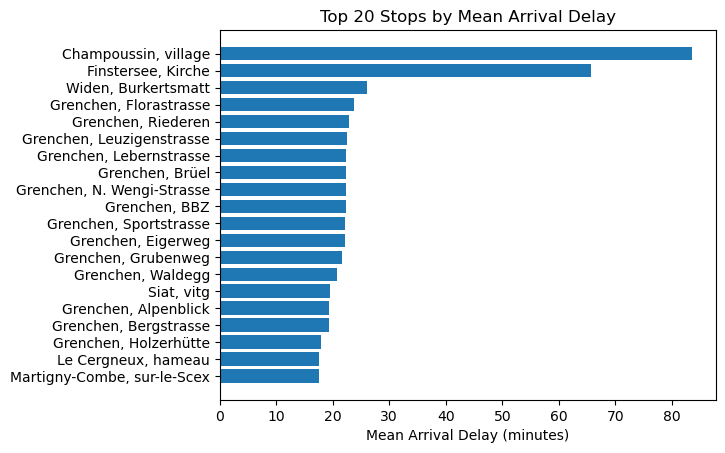

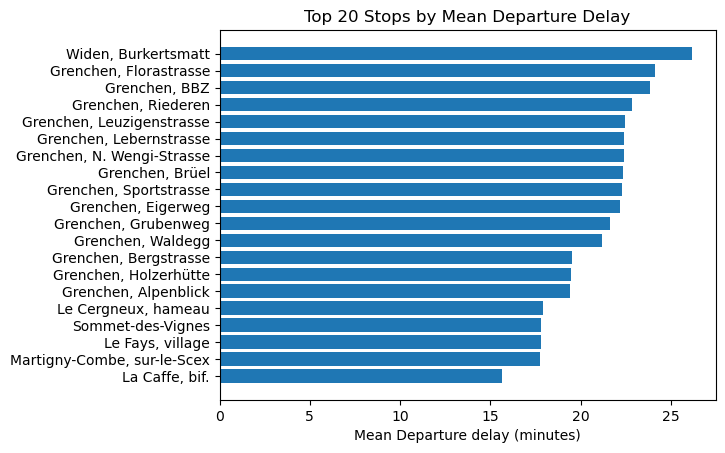

In [92]:
# Group the data by stop_name and calculate the mean arrival and departure delay for each stop
stop_delays = transport_data.groupby('stop_name')[['arrival_delay', 'departure_delay']].mean()

# Sort the data by the mean arrival delay in descending order
sorted_stops = stop_delays.sort_values('arrival_delay', ascending=False)

plt.barh(sorted_stops.index[:20], sorted_stops['arrival_delay'][:20], align='center')
plt.gca().invert_yaxis()
plt.xlabel('Mean Arrival Delay (minutes)')
plt.title('Top 20 Stops by Mean Arrival Delay')
plt.show()

# Sort the data by the mean departure delay in descending order
sorted_stops = stop_delays.sort_values('departure_delay', ascending=False)

plt.barh(sorted_stops.index[:20], sorted_stops['departure_delay'][:20], align='center')
plt.gca().invert_yaxis()
plt.xlabel('Mean Departure delay (minutes)')
plt.title('Top 20 Stops by Mean Departure Delay')
plt.show()

WHAT HAS BEEN DONE:

In [ ]:
transport_data.describe()

C:\Users\Ozan\AppData\Local\Temp\ipykernel_26268\669156617.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transport_data.describe()
C:\Users\Ozan\AppData\Local\Temp\ipykernel_26268\669156617.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transport_data.describe()
C:\Users\Ozan\AppData\Local\Temp\ipykernel_26268\669156617.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transp

,date,trip_id,operator_id,operator_abbreviation,operator_name,product_id,line_id,line_text,circuit_id,transport_type,...,is_cancelled,stop_id,stop_name,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip
count,2347175,2347175,2347175,2347175,2347175,2347042,2347175,2347175,1137342,2339682,...,2347175,2347175,2188441,2207604,2179615,2207980,2207949,2179175,2208289,2347175
unique,1,141527,135,130,126,7,13601,936,2835,28,...,2,21200,19967,1622,81362,4,1614,81462,4,2
top,2023-03-10 00:00:00,85:841:502-2082,85:801,PAG,PostAuto AG,Bus,85:827:10,1,601,B,...,False,8576646,"Bern, Bahnhof",2023-03-10 07:38:00,2023-03-10 16:59:00,REAL,2023-03-10 17:05:00,2023-03-10 16:55:00,REAL,False
freq,2347175,79,364633,364633,364633,1777815,14112,104034,3801,1905018,...,2323023,3844,3837,2583,141,1656758,2631,142,1700550,2347167
first,2023-03-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2023-03-10 00:00:00,2023-03-10 00:00:53,NaN,2023-03-10 00:00:00,2023-03-10 00:00:18,NaN,NaN
last,2023-03-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2023-03-11 05:07:00,2023-03-11 05:56:41,NaN,2023-03-11 05:05:00,2023-03-11 05:56:41,NaN,NaN


In [ ]:
transport_data[(transport_data["is_cancelled"])]["line_id"]

2               17234
39              17275
42              17278
143             17185
148             17192
              ...    
2305961    85:896:152
2305962    85:896:152
2305963    85:896:152
2305964    85:896:152
2305965    85:896:152
Name: line_id, Length: 24152, dtype: string

In [ ]:
# Here we compute the number of lines that had cancellation
num_cancelled = transport_data[(transport_data["is_cancelled"])]["line_id"].unique().shape[0]
num_cancelled

634

In [ ]:
# The total number of lines that day
num_lines = transport_data["line_id"].unique().shape[0]
num_lines

13601

In [ ]:
# The percentage of lines that had cancellation
print(f"{num_cancelled / num_lines: .2%}")

 4.66%


In [ ]:
# We add a new column to the datafram that contains the delay in minutes
transport_data["arrival_delay"] = (transport_data["arrival_forecast"] - transport_data["arrival_time"]).dt.total_seconds() / 60
transport_data["departure_delay"] = (transport_data["departure_forecast"] - transport_data["departure_time"]).dt.total_seconds() / 60

transport_data[['arrival_delay', 'departure_delay']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,arrival_delay,departure_delay
count,2179615.00000,2179175.00000
mean,1.41384,1.60938
std,5.56498,5.54900
min,-1442.01667,-1439.85000
25%,0.36667,0.53333
50%,1.08333,1.23333
75%,2.05000,2.20000
max,718.68333,718.68333


In [ ]:
# Only take rows where the arrival and delay forecast are "REAL"
(transport_data[(transport_data["arrival_forecast_status"] == "REAL") & (transport_data["departure_forecast_status"] == "REAL")]).describe().apply(lambda s: s.apply('{0:.5f}'.format))

,arrival_delay,departure_delay
count,1541021.00000,1541020.00000
mean,1.48480,1.69278
std,4.39073,4.38616
min,-1440.73333,-1439.85000
25%,0.51667,0.68333
50%,1.18333,1.36667
75%,2.11667,2.30000
max,75.08333,123.08333


## Analyse outliers and weird values

The delay is in minutes.

10000 minutes is 166 hours, which is 6.9 days. This is a lot.

In [ ]:
transport_data[transport_data["arrival_delay"] > 10000].shape[0]

0

In [ ]:
transport_data[transport_data["arrival_delay"] > 10000]

,date,trip_id,operator_id,operator_abbreviation,operator_name,product_id,line_id,line_text,circuit_id,transport_type,...,stop_name,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip,arrival_delay,departure_delay
902,2023-10-03,85:11:1093:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1093,IC6,<NA>,IC,...,Brig,2023-10-03 23:44:00,2023-11-03 00:02:15,REAL,NaT,NaT,NaN,False,43218.250000,NaN
1974,2023-10-03,85:11:14395:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,14395,S30,<NA>,S,...,Cheyres,2023-10-03 23:59:00,2023-11-03 00:01:20,REAL,2023-10-03 23:59:00,2023-11-03 00:01:57,REAL,False,43202.333333,43202.950000
1991,2023-10-03,85:11:14397:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,14397,S30,<NA>,S,...,Corcelles-Sud,2023-10-03 23:59:00,2023-11-03 00:01:29,PROGNOSE,2023-10-03 23:59:00,2023-11-03 00:04:28,REAL,False,43202.483333,43205.466667
2072,2023-10-03,85:11:14492:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,14492,S4,<NA>,S,...,Vallorbe,2023-10-03 23:49:00,2023-11-03 00:05:52,REAL,NaT,NaT,NaN,False,43216.866667,NaN
2461,2023-10-03,85:11:1545:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1545,IC,<NA>,IC,...,Neuchâtel,2023-10-03 23:56:00,2023-11-03 00:01:18,REAL,2023-10-03 23:58:00,2023-11-03 00:02:38,REAL,False,43205.300000,43204.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338619,2023-10-03,85:955:00041010122,85:955,TPL,Trasporti Pubblici Luganesi SA,Bus,85:955:410,10,<NA>,B,...,"Albonago, Sentiero di Camà",2023-10-03 23:59:00,2023-11-03 00:00:10,REAL,2023-10-03 23:59:00,2023-11-03 00:00:18,REAL,False,43201.166667,43201.300000
2339922,2023-10-03,85:955:00041212092,85:955,TPL,Trasporti Pubblici Luganesi SA,Bus,85:955:412,12,<NA>,B,...,"Castagnola, Roncaccio",2023-10-03 23:59:00,2023-11-03 00:00:02,REAL,2023-10-03 23:59:00,2023-11-03 00:00:12,REAL,False,43201.033333,43201.200000
2343121,2023-10-03,85:96:173:000,85:96,AVA-wsb,Aargau Verkehr AG,Zug,173,S14,<NA>,S,...,Unterkulm,2023-10-03 23:59:00,2023-11-03 00:00:13,PROGNOSE,2023-10-03 23:59:00,2023-11-03 00:03:30,REAL,False,43201.216667,43204.500000
2347126,2023-10-03,85:97:78:000,85:97,TRAVYS,Transports Vallée de Joux-Yverdon-Ste-Croix,Zug,78,R,<NA>,R,...,Essert-sous-Champvent,2023-10-03 23:57:00,2023-11-03 00:01:12,PROGNOSE,2023-10-03 23:57:00,2023-11-03 00:01:12,PROGNOSE,False,43204.200000,43204.200000


We can see that the problem comes from the fact that pandas reads the day in the "american" format rather than the ISO format...

Now after specifying day_first = True, we can see that the problem is gone.

In [ ]:
transport_data[transport_data["arrival_delay"] > 1000].shape[0]

0

In [ ]:
transport_data[transport_data["arrival_delay"] < -1000].shape[0]

14

In [ ]:
transport_data[transport_data["arrival_delay"] < -1000]

,date,trip_id,operator_id,operator_abbreviation,operator_name,product_id,line_id,line_text,circuit_id,transport_type,...,stop_name,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip,arrival_delay,departure_delay
272887,2023-03-10,85:22:2005:000,85:22,AB-ab,Appenzeller Bahnen (ab),Zug,2005,S21,<NA>,S,...,Gfeld,2023-03-11 00:31:00,2023-03-10 00:30:49,REAL,2023-03-11 00:31:00,2023-03-10 00:31:22,REAL,False,-1440.183333,-1439.633333
272888,2023-03-10,85:22:2005:000,85:22,AB-ab,Appenzeller Bahnen (ab),Zug,2005,S21,<NA>,S,...,Bendlehn,2023-03-11 00:32:00,2023-03-10 00:32:07,REAL,2023-03-11 00:32:00,2023-03-10 00:32:43,REAL,False,-1439.883333,-1439.283333
272889,2023-03-10,85:22:2005:000,85:22,AB-ab,Appenzeller Bahnen (ab),Zug,2005,S21,<NA>,S,...,Speicher,2023-03-11 00:35:00,2023-03-10 00:34:10,REAL,NaT,NaT,NaN,False,-1440.833333,NaN
466603,2023-03-10,85:51:7004:000,85:51,AB-fw,Appenzeller Bahnen (fw),Zug,7004,S15,<NA>,S,...,Frauenfeld Marktplatz,2023-03-11 00:28:00,2023-03-10 00:28:22,REAL,2023-03-11 00:28:00,2023-03-10 00:28:29,REAL,False,-1439.633333,-1439.516667
466604,2023-03-10,85:51:7004:000,85:51,AB-fw,Appenzeller Bahnen (fw),Zug,7004,S15,<NA>,S,...,Lüdem,2023-03-11 00:30:00,2023-03-10 00:30:29,REAL,2023-03-11 00:30:00,2023-03-10 00:30:29,REAL,False,-1439.516667,-1439.516667
466605,2023-03-10,85:51:7004:000,85:51,AB-fw,Appenzeller Bahnen (fw),Zug,7004,S15,<NA>,S,...,Weberei Matzingen,2023-03-11 00:33:00,2023-03-10 00:34:11,REAL,2023-03-11 00:33:00,2023-03-10 00:34:11,REAL,False,-1438.816667,-1438.816667
466606,2023-03-10,85:51:7004:000,85:51,AB-fw,Appenzeller Bahnen (fw),Zug,7004,S15,<NA>,S,...,Matzingen,2023-03-11 00:36:00,2023-03-10 00:35:16,REAL,2023-03-11 00:36:00,2023-03-10 00:36:13,REAL,False,-1440.733333,-1439.783333
466607,2023-03-10,85:51:7004:000,85:51,AB-fw,Appenzeller Bahnen (fw),Zug,7004,S15,<NA>,S,...,Jakobstal,2023-03-11 00:38:00,2023-03-10 00:39:13,REAL,2023-03-11 00:38:00,2023-03-10 00:39:13,REAL,False,-1438.783333,-1438.783333
466608,2023-03-10,85:51:7004:000,85:51,AB-fw,Appenzeller Bahnen (fw),Zug,7004,S15,<NA>,S,...,Wiesengrund,2023-03-11 00:39:00,2023-03-10 00:40:13,REAL,2023-03-11 00:39:00,2023-03-10 00:40:13,REAL,False,-1438.783333,-1438.783333
466609,2023-03-10,85:51:7004:000,85:51,AB-fw,Appenzeller Bahnen (fw),Zug,7004,S15,<NA>,S,...,Wängi,2023-03-11 00:41:00,2023-03-10 00:40:46,REAL,2023-03-11 00:41:00,2023-03-10 00:41:09,REAL,False,-1440.233333,-1439.850000


There seem to be a problem with the lines S21 and S15 from the Appenzeller Bahnen. The arrival/departure times and the forecasts are shifted by one day.

In [ ]:
transport_data[(transport_data["arrival_delay"] < -100) & (transport_data["arrival_delay"] > -1000)]

,date,trip_id,operator_id,operator_abbreviation,operator_name,product_id,line_id,line_text,circuit_id,transport_type,...,stop_name,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip,arrival_delay,departure_delay
1004208,2023-03-10,85:801:10659-704,85:801,PAG,PostAuto AG,Bus,85:801:704,106,<NA>,B,...,"Bern, Obergericht",2023-03-10 18:39:00,2023-03-10 16:35:37,REAL,2023-03-10 18:39:00,2023-03-10 16:36:04,REAL,False,-123.383333,-122.933333
1004209,2023-03-10,85:801:10659-704,85:801,PAG,PostAuto AG,Bus,85:801:704,106,<NA>,B,...,"Bern, Mittelstrasse",2023-03-10 18:40:00,2023-03-10 16:37:21,REAL,NaT,NaT,NaN,False,-122.650000,NaN
1008705,2023-03-10,85:801:10570-709,85:801,PAG,PostAuto AG,Bus,85:801:709,105,<NA>,B,...,"Bern, Hauptbahnhof",2023-03-10 18:28:00,2023-03-10 16:34:53,REAL,NaT,NaT,NaN,False,-113.116667,NaN
1027259,2023-03-10,85:801:18059-903,85:801,PAG,PostAuto AG,Bus,85:801:903,180,<NA>,B,...,"Les Diablerets, Les Preises",2023-03-10 14:26:00,2023-03-10 11:55:41,PROGNOSE,2023-03-10 14:26:00,2023-03-10 14:26:00,PROGNOSE,False,-150.316667,0.000000
1126838,2023-03-10,85:816:166845-46011-1,85:816,AAGU,Auto AG Uri,Bus,85:816:407,407,364701,B,...,Amsteg St. Anton,2023-03-10 15:04:00,2023-03-10 13:22:04,UNBEKANNT,2023-03-10 15:04:00,2023-03-10 13:22:05,UNBEKANNT,False,-101.933333,-101.916667
1126839,2023-03-10,85:816:166845-46011-1,85:816,AAGU,Auto AG Uri,Bus,85:816:407,407,364701,B,...,Amsteg Post,2023-03-10 15:12:00,2023-03-10 13:22:06,REAL,NaT,NaT,NaN,False,-109.900000,NaN
1651761,2023-03-10,85:841:506-6906,85:841,AAGS,Auto AG Schwyz,Bus,85:841:506,506,<NA>,B,...,<NA>,2023-03-10 15:58:00,2023-03-10 09:58:28,REAL,NaT,NaT,NaN,False,-359.533333,NaN
1651776,2023-03-10,85:841:506-6917,85:841,AAGS,Auto AG Schwyz,Bus,85:841:506,506,<NA>,B,...,<NA>,2023-03-10 16:17:00,2023-03-10 10:18:59,REAL,NaT,NaT,NaN,False,-358.016667,NaN
2010822,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Genève, Collège Sismondi",2023-03-10 17:46:00,2023-03-10 05:56:41,PROGNOSE,2023-03-10 17:46:00,2023-03-10 05:56:41,PROGNOSE,False,-709.316667,-709.316667
2010823,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Genève, Maison de la Paix",2023-03-10 17:47:00,2023-03-10 05:56:41,PROGNOSE,2023-03-10 17:47:00,2023-03-10 05:56:41,PROGNOSE,False,-710.316667,-710.316667


We can also see some transports that arrived or departed more than 100 minutes (less than 1000 minutes) before the scheduled time.

In [ ]:
transport_data[transport_data["arrival_delay"] > 700]

,date,trip_id,operator_id,operator_abbreviation,operator_name,product_id,line_id,line_text,circuit_id,transport_type,...,stop_name,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip,arrival_delay,departure_delay
2010828,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Genève, Stand",2023-03-10 17:58:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 17:58:00,2023-03-11 05:56:41,PROGNOSE,False,718.683333,718.683333
2010829,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Genève, Cirque",2023-03-10 18:00:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:00:00,2023-03-11 05:56:41,PROGNOSE,False,716.683333,716.683333
2010830,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Genève, Plainpalais",2023-03-10 18:02:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:02:00,2023-03-11 05:56:41,PROGNOSE,False,714.683333,714.683333
2010831,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Genève, Uni-Mail",2023-03-10 18:03:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:03:00,2023-03-11 05:56:41,PROGNOSE,False,713.683333,713.683333
2010832,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Genève, Acacias",2023-03-10 18:05:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:05:00,2023-03-11 05:56:41,PROGNOSE,False,711.683333,711.683333
2010833,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Genève, Industrielle",2023-03-10 18:07:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:07:00,2023-03-11 05:56:41,PROGNOSE,False,709.683333,709.683333
2010834,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Carouge GE, Pictet-Thellusson",2023-03-10 18:08:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:08:00,2023-03-11 05:56:41,PROGNOSE,False,708.683333,708.683333
2010835,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Lancy-Pont-Rouge, gare/Etoile",2023-03-10 18:10:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:10:00,2023-03-11 05:56:41,PROGNOSE,False,706.683333,706.683333
2010836,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Grand-Lancy, Mairie de Lancy",2023-03-10 18:12:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:12:00,2023-03-11 05:56:41,PROGNOSE,False,704.683333,704.683333
2010837,2023-03-10,85:881:TPG015-4503784315733856,85:881,TPG,Transports Publics Genevois,Tram,85:881:TPG015,15,<NA>,T,...,"Grand-Lancy, Place du 1er-Août",2023-03-10 18:13:00,2023-03-11 05:56:41,PROGNOSE,2023-03-10 18:13:00,2023-03-11 05:56:41,PROGNOSE,False,703.683333,703.683333


This tram seem to have delayed 11 hours wich seems a bit weird and might be an error or has default values for the arrival/departure times.

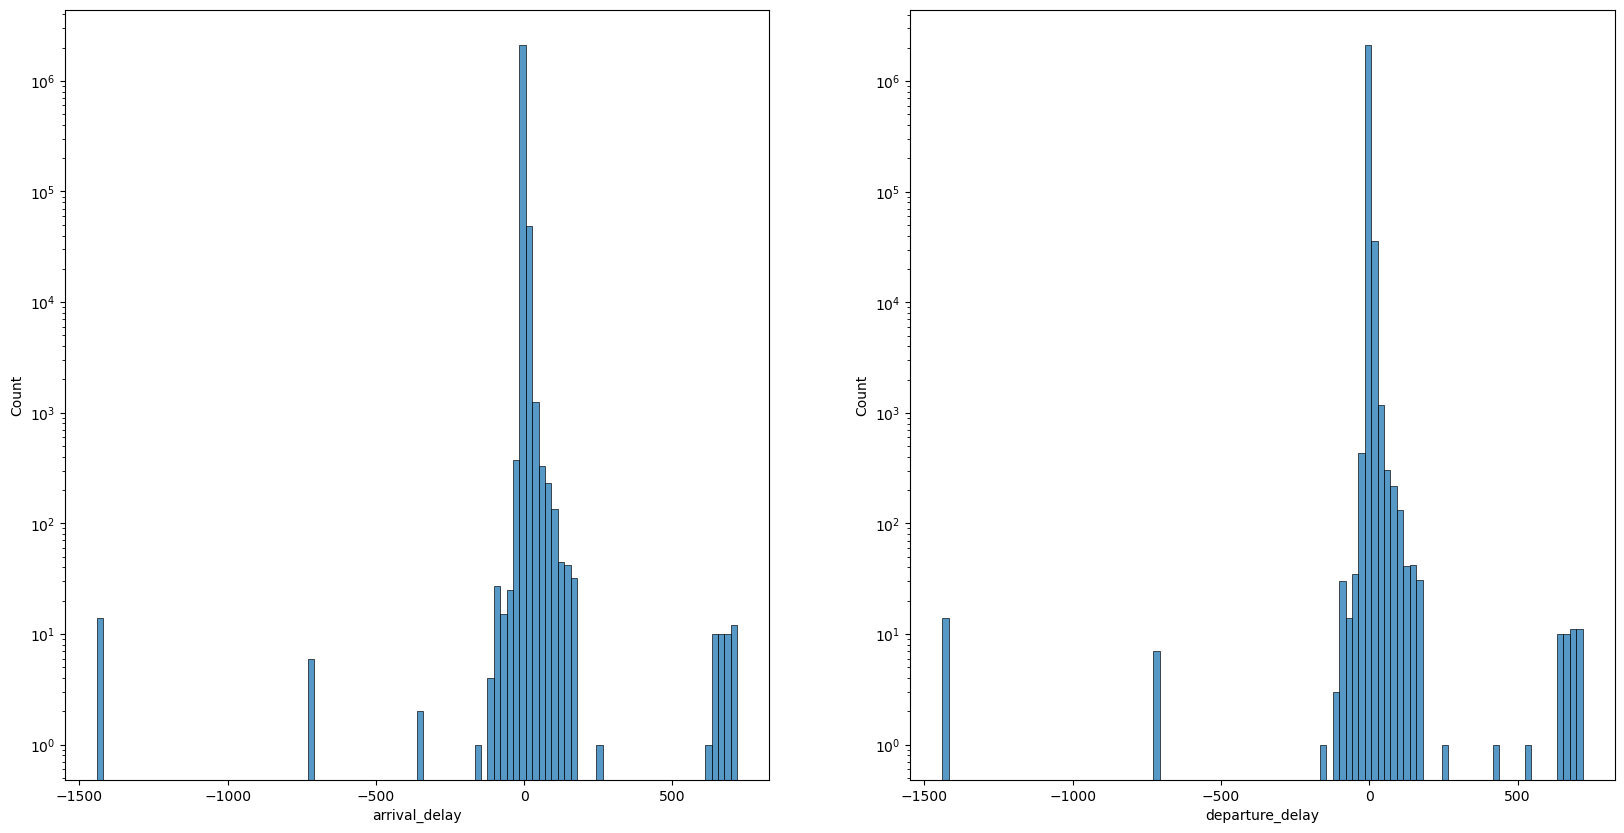

In [ ]:
# Plot histograms
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(data=transport_data[(transport_data["arrival_delay"] > -10000) & (transport_data["arrival_delay"] < 10000)], x="arrival_delay", bins=100, log_scale=(False, True), ax=ax[0])
sns.histplot(data=transport_data[(transport_data["departure_delay"] > -10000) & (transport_data["departure_delay"] < 10000)], x="departure_delay", bins=100, log_scale=(False, True), ax=ax[1])

plt.show()